# TP2- Régression linéaire "from scratch"
## TP2-2.  Fonction coût

## Objectifs
Implémentation et exploration de la fonction  `cost` pour la régression linéaire avec une variable.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


<a name="1"></a>
## 1-Le Dataset (la tâche) 

On reste sur le problème de prédiction des prix des logements en fonction de leur taille.  
Utilisons les deux mêmes points de données que dans le laboratoire précédent - une maison de 1 000 $m^2$  s'est vendue *300 000* et une maison de *2 000* $m^2$  s'est vendue *500 000*.

| Superficie (1000 $m^2$)     | prix (1000s euros) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                 | 500                      |


In [7]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

<a name="1"></a>
## 2. Fonction coût
Le coût ici désigne la fonction objective, elle mesure l'efficacité de notre modèle à prédire le prix cible de la maison, à ne pas confondre avec Le terme "prix"  utilisé pour les données relatives au logement.

L'équation du coût avec une seule variable est la suivante :
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$
 
où 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
- $f_{w,b}(x^{(i)})$ est notre prédiction pour l'exemple $i$ en utilisant les paramètres $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ est la différence au carré entre la valeur cible $y^{(i)}$ et la prédiction $f_{w,b}(x^{(i)}$.   
- Ces différences sont additionnées sur tous les $m$ exemples et divisées par `2m` pour produire le coût, $J(w,b)$.  
>Remarque : dans les cours magistraux, les plages de sommation vont généralement de 1 à m, alors que le code va de 0 à m-1.


### Calcul du coût
**Question** : Ecrire le code de la fonction qui calcule et renvoie (return) le coût total. 

In [ ]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]  
    cost_sum = 0 
    
    for i in range(m): 
        cost_sum = cost_sum + ((w*x[i]+b)- y[i])**2

    total_cost = (1/(2*m))*cost_sum
    return total_cost

La fonction ci-dessous permet de tracer le graphe des prédictions et celui des vraies valeurs

In [4]:
# une fonction qui permet de tracer le graphe des prédictions et celui des vraies valeurs
def my_plot(x_train, y_train,tmp_f_wb):
    #desin du graphique
    plt.plot(x_train, tmp_f_wb, c='b',label='Les prédictions')

        # Plot the data points
    plt.scatter(x_train, y_train, marker='x', c='r',label='Vraies valeurs')


### Question :
Essayons de trouver les bonnes valeurs de $w$ et $b$ par tatonnement 
L'objectif est de trouver les bons paramètres  $w,b$, du modèle c-a-d la $f_{w,b}(x) = wx + b$, avec les paramètres $w,b$<br>
Ecrire le code (cellule ci-dessous) qui pemet :
- de faire varier w dans un range *w_range = np.array([200-200,200+200]) avec des pas de 5 ($\Delta{w}=5$)
- On boucle : 
    - en calculant pour chaque $w$ le *cout*, *f_wb* puis on *plot* , les deux courbes 
- Condiction d'arrêt si le cout total est inférieur à une cetaine valeur par eempl 0.5

In [10]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb # renvoie le résultat de le vecteur comportant les résultats de f

In [14]:
def compute_w_b(x_train, y_train):
    w_range = np.array([0, 400])
    tmp_b = 100
    w_array = np.arange(w_range[0], w_range[1], 5)
    print('les valeurs de w_range sont: ', w_array)
    cost = np.zeros_like(w_array, dtype=float)
    for i, w in enumerate(w_array):
        # Calculer le coût pour tous les points
        cost[i] = compute_cost(x_train, y_train, w, tmp_b)
        # Calculer les valeurs prédites pour l'ensemble x_train
        f_wb = compute_model_output(x_train, w, tmp_b)
        # Tracer les points et la droite prédite
        plt.scatter(x_train, y_train, marker='x', c='r', label='Vraies valeurs' if i == 0 else "")
        plt.plot(x_train, f_wb, c='b', label=f'Prédiction w={w}' if i == 0 else "")
        # Condition d'arrêt
        if cost[i] < 0.5:
            print('Les valeurs de w et b sont :', w, tmp_b)
            break
    plt.xlabel('Superficie (1000 m²)')
    plt.ylabel('Prix (1000 €)')
    plt.title('Régression linéaire - recherche de w')
    plt.legend()
    plt.show()

les valeurs de w_range sont:  [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395]
Les valeurs de w et b sont : 200 100


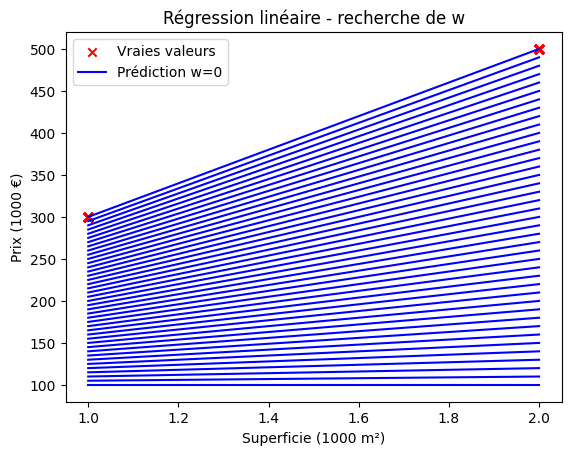

In [15]:

plt.figure() # Création d'une figure
 # Set the title
plt.title("Prix")
# Set the y-axis label
plt.ylabel('Prix (1000) euros)')
# Set the x-axis label
plt.xlabel('Superficie (100m2)')

compute_w_b(x_train,y_train)
plt.show()

Le graphique contient quelques points qui méritent d'être mentionnés.
- Le coût est minimisé lorsque $w = 200$, ce qui correspond aux résultats du TP précdent
- Parce que la différence entre la cible et la pédiction est élevée au carré dans l'équation de coût, le coût augmente rapidement lorsque $w$ est trop grand ou trop petit.
- L'utilisation des valeurs `w` et `b` sélectionnées par la minimisation du coût permet d'obtenir une droite qui s'ajuste parfaitement aux données.

### Question :
Examinons un scénario  avec quelques points de données supplémentaires. 
Cet ensemble de données comprend des points de données qui ne se situent pas sur la même ligne. 
- visualiser les points (Xtrain et y_train) (fait)
- relancer le code permmetant de trouver les valeur de w et b et de tracer les courbes prédites. (fait)
- quelles ont les valeurs trouvées pour w et b ?

Qu'est-ce que cela signifie pour l'équation de coût ?<br>
Pouvons-nous trouver $w$ et $b$ qui nous donneront un coût de 0 ?

In [ ]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,  630, 730])

In [ ]:
## réecrire le code 

plt.figure() # Création d'une figure
 # Set the title
plt.title("Prix")
# Set the y-axis label
plt.ylabel('Prix (1000) euros)')
# Set the x-axis label
plt.xlabel('Superficie (100m2)')

compute_w_b(x_train,y_train)
plt.show()

COnstat ?

# Exercice
On travaille sur le fichier houses.txt.

Reprendre les codes  essayez de trouver les meilleures valeurs de w et b pour les données du dataset houses.
On reste sur une variable par exemple prédire le prix d'une maison en fonction de sa supérficie.

- tracer les courbes prédictions versus vraies valeurs (pour ls différentes valeurs de w et b.
- quelles sont les meilleurs valeurs de paramèes du modèle.

## En conclusion : Difficile de trouver les valeurs de w et b par tatonnement.
### La solution est la descente du gradient (voir TP suivant)

### Question supplémentaire
- reécrire les codes des fonctions `compute_cost`, `compute_w_b`,`compute_model_output` qui prennent en compte plusieurs variables (caractéristiques) (la dernière fonction est censée avoir été écrite dans le TP précédent).
